In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Читаем

In [23]:
def get_label(lst):
    for i in range(10):
        if lst[i]:
            return i

In [24]:
cols = [i for i in range(1,257)]

df = pd.read_csv('semiondata.csv', sep=' ')
df.head()

,0.0000,0.0000.1,0.0000.2,0.0000.3,0.0000.4,0.0000.5,1.0000,1.0000.1,1.0000.2,1.0000.3,...,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,Unnamed: 266
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN


In [25]:
df_ans = df.iloc[:,256:266].apply(get_label, axis=1)

In [26]:
df = df.drop(df.columns[256:], axis=1)
df = df.rename(columns = dict(zip(df.columns[:256],cols)))

# Рисуем по первому примеру каждой цифры

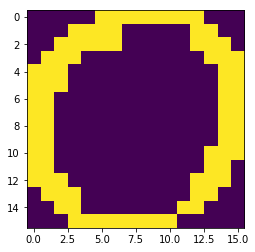

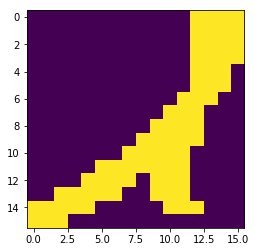

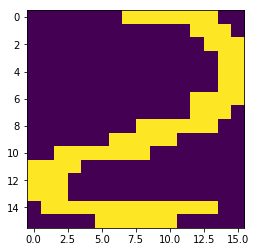

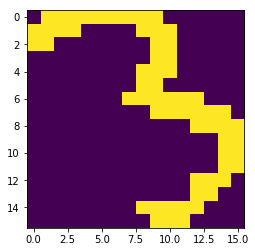

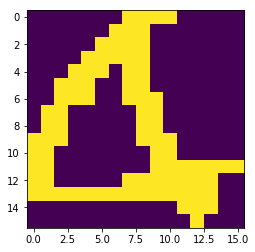

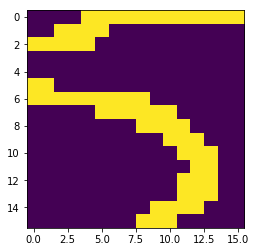

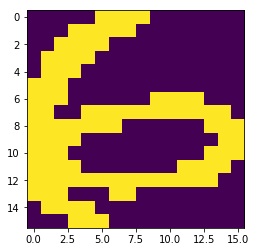

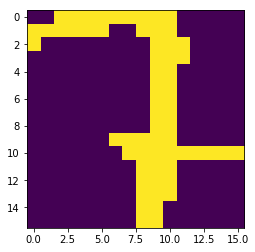

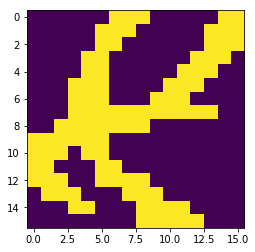

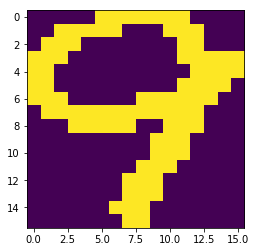

In [27]:
for i in df_ans.unique():
    plt.imshow(np.array(df.iloc[df_ans[df_ans==i].index[0],:]).reshape(16,16))
    plt.show();

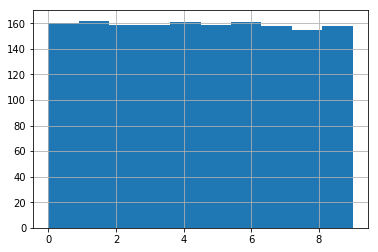

In [28]:
df_ans.hist();

# Сплитим, пихаем в knn, смотрим на accuracy, немного крутим параметры, acc++ => profit 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:256]], df_ans,
                                                    test_size=0.33, random_state=50)

In [31]:
model = KNeighborsClassifier()

model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
model.score(x_test, y_test)

0.9163498098859315

In [33]:
model1 = KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree', weights='distance')
model1.fit(x_train, y_train)
model1.score(x_test, y_test)

0.9201520912547528

==============================================================================================
# Пробежимся gridsearch

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = dict(n_neighbors=list(range(1, 30)), 
                  weights=['uniform', 'distance'], 
                  algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'])

In [36]:
grid = GridSearchCV(model, param_grid, cv=10, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8977485928705441
{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}


In [37]:
grid.best_estimator_.score(x_test, y_test)

0.9258555133079848

# Ну глаз не так уж и плох.